In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmsc606.hw.hw2.hw2_impl import (
    read_csv_convert_to_numpy,
    calc_error_rate_for_single_vector_w,
    train_and_evaluate,
    function_error_rate_2D
)

In [2]:
# helper functions
def plot_trained_w_and_dataset(numpy_x, numpy_y, w):
    samples_class1 = numpy_y.flatten() == 1
    samples_class0 = numpy_y.flatten() == -1
    plt.scatter(numpy_x[samples_class1, 0], numpy_x[samples_class1, 1], c="red")
    plt.scatter(numpy_x[samples_class0, 0], numpy_x[samples_class0, 1], c="green")
    plt.xlabel("ZeroTwoSixty")
    plt.ylabel("PowerHP")

    if w[1] == 0:  # weights are (something,0); feature x2 doesn't matter
        x2_line = np.linspace(-2, 2, 100)
        x1_line = 0 * x2_line
    else:
        x1_line = np.linspace(-2, 2, 100)
        x2_line = (-w[0] * x1_line) / w[1]

    # Create a blue line based on the equation
    plt.plot(x1_line, x2_line, c="blue")
    plt.show()

def plot3D_function_on_grid(function_to_plot, numpy_x, numpy_y):
    # Create a meshgrid
    w1min, w1max = -2.0, 2.0
    w2min, w2max = -2.0, 2.0

    w1_range = np.arange(w1min, w1max, 0.01)
    w2_range = np.arange(w2min, w2max, 0.01)

    error_rates_values_for_W1W2 = function_to_plot(
        w1_range, w2_range, numpy_x, numpy_y
    )
    W1, W2 = np.meshgrid(w1_range, w2_range)

    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Create the surface plot
    surface = ax.plot_surface(
        W1,
        W2,
        error_rates_values_for_W1W2,
        cmap="viridis",
        alpha=0.8,
        edgecolor="black",
    )

    # Add labels and title
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.set_zlabel("error rate")
    ax.set_zlim(-0.5, 1.5)
    return ax

def plot_function_on_grid(function_to_plot, numpy_x, numpy_y):
    # Create a meshgrid from -2.0 to +2.0
    range_ws = 2.0
    w1min, w1max = -range_ws, range_ws
    w2min, w2max = -range_ws, range_ws

    w1_range = np.arange(w1min, w1max, 0.01)
    w2_range = np.arange(w2min, w2max, 0.01)

    error_rates_values_for_W1W2 = function_to_plot(
        w1_range, w2_range, numpy_x, numpy_y
    )
    W1, W2 = np.meshgrid(w1_range, w2_range)

    # Create a figure and a 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111)

    img = ax.imshow(
        error_rates_values_for_W1W2,
        origin="lower",
        cmap="coolwarm",
        extent=[w1min, w1max, w2min, w2max],
        aspect="auto",
    )  # 'coolwarm' goes from blue (low) to red (high)
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.set_xlim(w1min, w1max)
    ax.set_ylim(w2min, w2max)
    cbar = fig.colorbar(
        img
    )  # Add a color bar to show the mapping of values to colors
    cbar.set_label("error rate")

    plt.show()

In [3]:
# Testing read_csv_convert_to_numpy & calc_error_rate_for_single_vector_w
# see HW2 slides for expected output
numpy_x, numpy_y = read_csv_convert_to_numpy(fileName="../data/carSUV_normalized.csv")

In [4]:
np.random.seed(3)  # to fix randomness
random_w = np.random.randn(2, 1)
print("Random weights array shape", random_w.shape)
print("Random weights values\n", random_w)

Random weights array shape (2, 1)
Random weights values
 [[1.78862847]
 [0.43650985]]


In [5]:
error_rate_random_weights = calc_error_rate_for_single_vector_w(
    random_w, numpy_x, numpy_y
)
print("Error rate for random weights", error_rate_random_weights)

Error rate for random weights 5.0


In [6]:
# Testing train_and_evaluate; Running data reading, model training, and plotting the linear model over the dataset, using the functions defined above.
# see HW2 slides for expected output
np.random.seed(8)  # to eliminate randomness
trained_w = train_and_evaluate(numpy_x, numpy_y, n_epochs=20, c=0.01)
print(trained_w)

5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
[-0.02051863 -0.02167551]


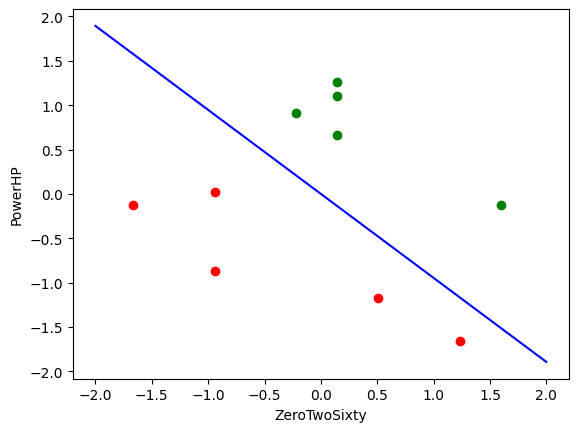

In [7]:
plot_trained_w_and_dataset(numpy_x, numpy_y, trained_w)

In [8]:
# CMSC 606 only: Error rate surface plot, over possible model weights, using functions defined above

# Testing function_error_rate_2D
# see HW2 slides for expected output
range_ws = 2.0
w1min, w1max = -range_ws, range_ws
w2min, w2max = -range_ws, range_ws
w1_range = np.arange(w1min, w1max, 0.01)
w2_range = np.arange(w2min, w2max, 0.01)

In [9]:
error_rates_all_ws = function_error_rate_2D(w1_range, w2_range, numpy_x, numpy_y)
print(error_rates_all_ws)

[[0.  0.  0.  ... 0.6 0.6 0.6]
 [0.  0.  0.  ... 0.6 0.6 0.6]
 [0.  0.  0.  ... 0.6 0.6 0.6]
 ...
 [0.4 0.4 0.4 ... 1.  1.  1. ]
 [0.4 0.4 0.4 ... 1.  1.  1. ]
 [0.4 0.4 0.4 ... 1.  1.  1. ]]


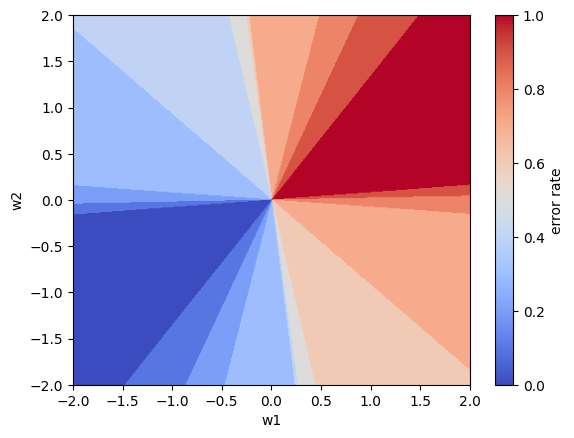

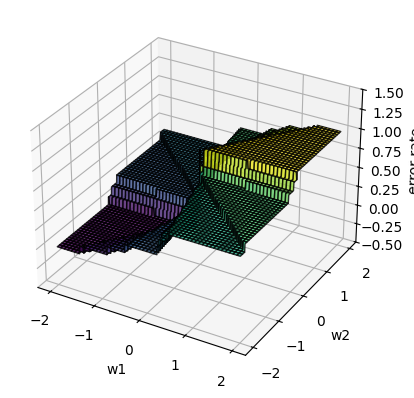

In [10]:
ax = plot_function_on_grid(function_error_rate_2D, numpy_x, numpy_y)
plt.show()
ax = plot3D_function_on_grid(function_error_rate_2D, numpy_x, numpy_y)
plt.show()